In [21]:
# https://www.kaggle.com/competitions/deceptive-points-aicc-round-0

import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
from itertools import combinations
import math

In [22]:
train = pd.read_csv("/kaggle/input/deceptive-points-aicc-round-0/train.csv")
test = pd.read_csv("/kaggle/input/deceptive-points-aicc-round-0/test.csv")

train.shape, test.shape

((180, 5), (120, 5))

In [23]:
train.head()

,feature1,feature2,feature3,feature4,target
0,-4.973675,7.093568,-0.153496,9.400500,-11.100981
1,0.917252,7.904774,1.189619,1.864921,9.324822
2,8.137991,-3.755653,6.936703,14.174913,-6.015563
3,8.737271,-1.220908,-3.365430,9.303323,10.848881
4,1.772946,-3.452335,5.933342,-6.867038,17.858051


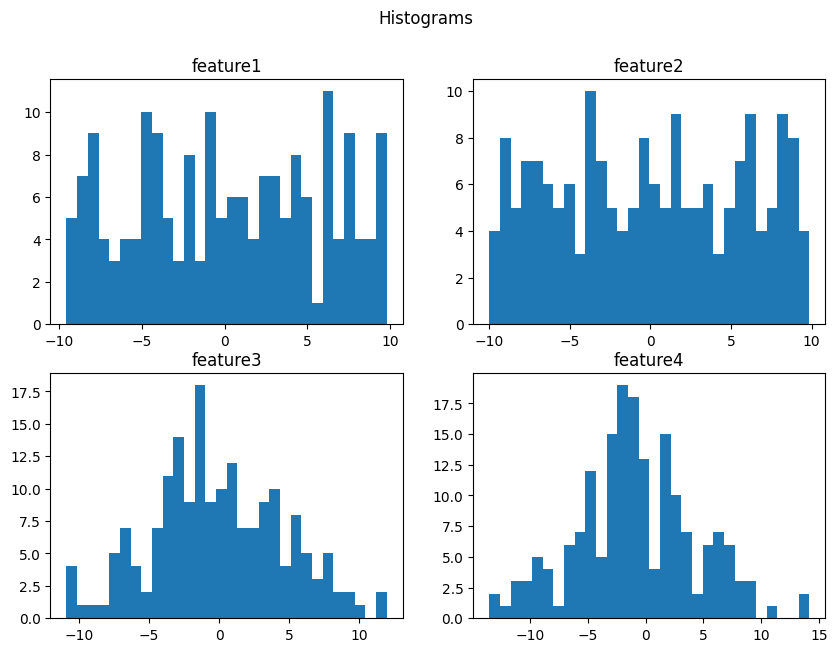

In [33]:
plt.figure(figsize=(10, 7))
plt.suptitle('Histograms')

for i in range(1, 5):
    plt.subplot(2, 2, i)
    plt.title(f'feature{i}')
    plt.hist(train[f'feature{i}'], bins=30)
    
plt.show()

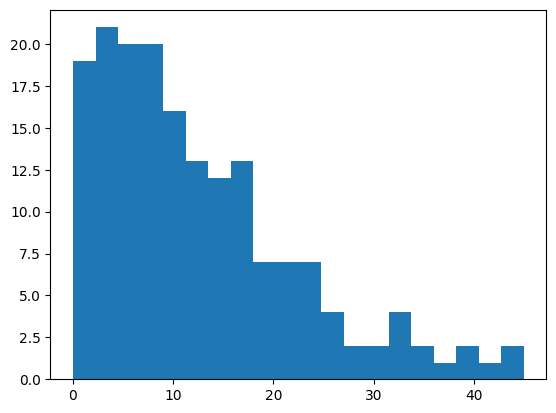

In [24]:
from sklearn.linear_model import LinearRegression

temp = LinearRegression()

temp.fit(train.iloc[:5, :4], train.iloc[:5, 4])

plt.hist(abs(temp.predict(train.iloc[:, :4])[5:] - train.iloc[5:, 4].values), bins=20)
plt.show()

In [25]:
X = train.iloc[:, :4].values
X = np.concatenate([X, np.ones((X.shape[0], 1))], axis=1)
y = train.iloc[:, 4].values

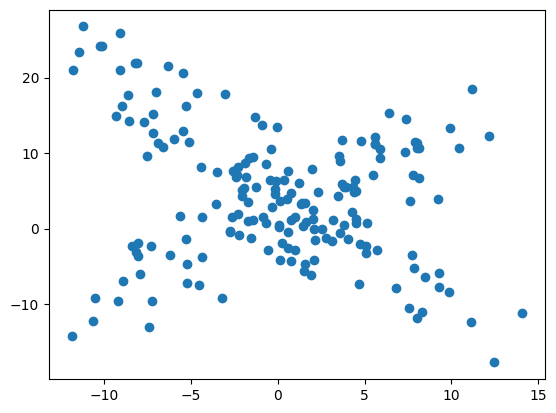

In [31]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)

X_pca = pca.fit_transform(X)

plt.scatter(X_pca, y)
plt.show()

In [17]:
epochs = 1000000
best = (None, None)

std = train['target'].std()
k = 0.275
thr = k*std

print(f'Possible number: {math.comb(len(train), 5)}')
print(f'Starting looking in {epochs} ({epochs/math.comb(len(train), 5):.5f}%)')

np.random.seed(42)

for _ in tqdm(range(epochs)):
    indices = np.random.choice(range(len(train)), size=5, replace=False)
    
    w = np.linalg.lstsq(X[indices], y[indices])[0]
    y_pred = X @ w
    diff = abs(y_pred - y)
    inliers = np.where(diff <= thr)[0]

    if best[0] is None or len(best[0]) < len(inliers):
        best = (inliers, indices)

len(best[0]), best[1]

Possible number: 1488847536
Starting looking in 1000000 (0.00067%)


  0%|          | 0/1000000 [00:00<?, ?it/s]

(105, array([ 96,   3, 123, 108,  49]))

In [18]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X[best[0]], y[best[0]])

LinearRegression()

In [19]:
X_test = test.iloc[:, 1:].values
X_test = np.concatenate([X_test, np.ones((X_test.shape[0], 1))], axis=1)

y_pred = model.predict(X_test)

subm = pd.DataFrame({
    'ID': test['ID'],
    'Target': y_pred
})

subm.to_csv("submission.csv", index=False)

subm.head()

,ID,Target
0,0.0,16.979142
1,1.0,2.686376
2,2.0,-2.765819
3,3.0,4.233618
4,4.0,6.496967
